In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def plot_function(f,xmin,xmax,**kwargs):
    ts = np.linspace(xmin,xmax,1000)
    plt.plot(ts,[f(t) for t in ts],**kwargs)
    
def scalar_field_heatmap(f,xmin,xmax,ymin,ymax,xsteps=100,ysteps=100):
    fig = plt.figure()
    fig.set_size_inches(7,7)
    fv = np.vectorize(f)
    X = np.linspace(xmin, xmax, xsteps)
    Y = np.linspace(ymin, ymax, ysteps)
    X, Y = np.meshgrid(X, Y)
    z = fv(X,Y)
    fig, ax = plt.subplots()
    c = ax.pcolormesh(X,Y,z, cmap='plasma')
    ax.axis([X.min(), X.max(), Y.min(), Y.max()])
    fig.colorbar(c, ax=ax)
    
def plot_scalar_field(f,xmin,xmax,ymin,ymax,xsteps=100,ysteps=100,c=None,cmap=cm.coolwarm,alpha=1,antialiased=False, zorder=0):
    fig = plt.gcf()
    fig.set_size_inches(7,7)
    ax = fig.gca(projection='3d')

    fv = np.vectorize(f)
    
    # Make data.
    X = np.linspace(xmin, xmax, xsteps)
    Y = np.linspace(ymin, ymax, ysteps)
    X, Y = np.meshgrid(X, Y)
    Z = fv(X,Y)

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cmap,color=c,alpha=alpha,
                           linewidth=0, antialiased=antialiased, zorder=zorder)

In [3]:
def bmw_finder(mileage,price):
    if price > 25000:
        return 1
    else:
        return 0

In [4]:
from car_data import bmws, priuses

In [5]:
all_car_data = []

In [6]:
for bmw in bmws:
    all_car_data.append((bmw.mileage,bmw.price,1))
for prius in priuses:
    all_car_data.append((prius.mileage,prius.price,0))

In [9]:
def test_classifier(classifier,data):
    trues = 0
    falses = 0
    true_positives = 0
    true_negatives = 0
    false_positives = 0
    false_negatives = 0
    for mileage, price, is_bmw in data:
        res = classifier(mileage,price)
        if res == is_bmw:
            trues += 1
            if res == 1:
                true_positives += 1
            else:
                true_negatives += 1
        else:
            falses += 1
            if res == 1:
                false_positives += 1
            else:
                false_negatives += 1
    print("true positives %f" % true_positives)
    print("true negatives %f" % true_negatives)
    print("false positives %f" % false_positives)
    print("false negatives %f" % false_negatives)
    return trues / (trues+falses)

In [10]:
test_classifier(bmw_finder,all_car_data)

true positives 18.000000
true negatives 100.000000
false positives 0.000000
false negatives 82.000000


0.59

In [12]:
def plot_data(ds):
    plt.scatter([d[0] for d in ds if d[2]==0],[d[1] for d in ds if d[2]==0],c='C1')
    plt.scatter([d[0] for d in ds if d[2]==1],[d[1] for d in ds if d[2]==1],c='C0',marker='x')
    plt.ylabel("Price ($)",fontsize=16)
    plt.xlabel("Odometer (mi)",fontsize=16)

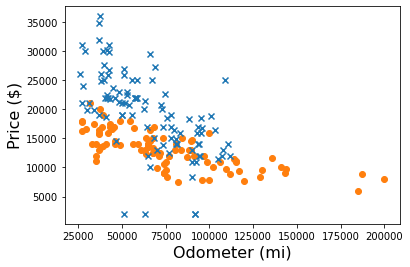

In [13]:
plot_data(all_car_data)

In [16]:
def decision_boundary_classify(mileage,price):
    if price > 21000 - 0.07 * mileage:
        return 1
    else:
        return 0

In [17]:
test_classifier(decision_boundary_classify,all_car_data)

true positives 73.000000
true negatives 88.000000
false positives 12.000000
false negatives 27.000000


0.805

In [18]:
def make_scale(data):
    min_val = min(data)
    max_val = max(data)
    def scale(x):
        return (x-min_val) / (max_val-min_val)
    def unscale(y):
        return y*(max_val-min_val) + min_val
    return scale, unscale

In [19]:
price_scale, price_unscale = make_scale([x[1] for x in all_car_data])
mileage_scale, mileage_unscale = make_scale([x[0] for x in all_car_data])

In [20]:
scaled_car_data = [(mileage_scale(mileage), price_scale(price), is_bmw) for mileage,price,is_bmw in all_car_data]

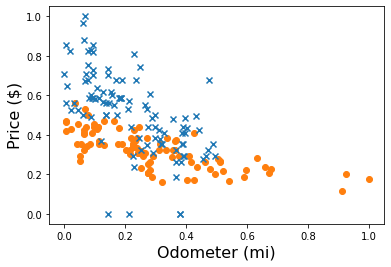

In [21]:
plot_data(scaled_car_data)

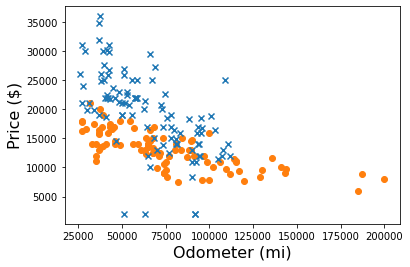

In [22]:
plot_data(all_car_data)

In [30]:
from math import exp, log

In [31]:
def sigmoid(x):
    return 1/(1+exp(-x))

In [32]:
def make_logistic(a,b,c):
    def l(x,p):
        return sigmoid(a*x+b*p-c)
    return l

In [33]:
def simple_logistic_cost(a,b,c):
    l = make_logistic(a,b,c)
    errors = [abs(is_bmw-l(x,p)) for x,p,is_bmw in scaled_car_data]
    return sum(errors)

In [36]:
def point_cost(l,x,p,is_bmw):
    wrong = 1 - is_bmw
    return -log(abs(wrong - l(x,p)))

In [37]:
def logistic_cost(a,b,c):
    l = make_logistic(a,b,c)
    errors = [point_cost(l,x,p,is_bmw) for x,p,is_bmw in scaled_car_data]
    return sum(errors)

In [38]:
def plot_line(acoeff,bcoeff,ccoeff,**kwargs):
    a,b,c = acoeff, bcoeff, ccoeff
    
    # black by default
    if 'c' not in kwargs:
        kwargs['c'] = 'k'
        
    if b == 0:
        plt.plot([c/a,c/a],[0,1])
    else:
        def y(x):
            return (c-a*x)/b
        plt.plot([0,1],[y(0),y(1)],**kwargs)

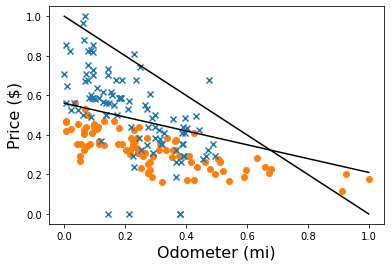

In [39]:
plot_data(scaled_car_data)
plot_line(0.35,1,0.56)
plot_line(1,1,1)

In [40]:
logistic_cost(0.35,1,0.56)

130.92490748700456

In [41]:
logistic_cost(1,1,1)

135.56446830870456

In [42]:
from math import sqrt
def length(v):
    return sqrt(sum([vi*vi for vi in v]))

def secant_slope(f,xmin,xmax):
    return (f(xmax) - f(xmin)) / (xmax - xmin)

def approx_derivative(f,x,dx=1e-6):
    return secant_slope(f,x-dx,x+dx)

In [43]:
def approx_gradient3(f,x0,y0,z0,dx=1e-6):
    partial_x = approx_derivative(lambda x:f(x,y0,z0),x0,dx=dx)
    partial_y = approx_derivative(lambda y:f(x0,y,z0),y0,dx=dx)
    partial_z = approx_derivative(lambda z:f(x0,y0,z),z0,dx=dx)
    return (partial_x, partial_y, partial_z)

In [54]:
def gradient_descent3(f,xstart,ystart,zstart,tolerance=1e-6,max_steps=1000):
    x = xstart
    y = ystart
    z = zstart
    grad = approx_gradient3(f,x,y,z)
    steps = 0
    while length(grad) > tolerance and steps < max_steps:
        x -= 0.01 * grad[0]
        y -= 0.01 * grad[1]
        z -= 0.01 * grad[2]
        grad = approx_gradient3(f,x,y,z)
        steps += 1
    print("total steps taken %f" % steps)
    return x,y,z

In [55]:
gradient_descent3(logistic_cost,1,1,1,max_steps=100)

total steps taken 100.000000


(0.21114493148496014, 5.045439728207488, 2.1260122566471376)

In [56]:
gradient_descent3(logistic_cost,1,1,1,max_steps=200)

total steps taken 200.000000


(0.8845715265377516, 6.65754318727634, 2.9550572849988455)

In [57]:
gradient_descent3(logistic_cost,1,1,1,max_steps=8000)

total steps taken 7243.000000


(3.7167003088210118, 11.422062406779267, 5.596878365032182)

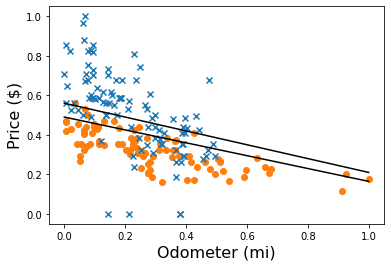

In [58]:
plot_data(scaled_car_data)
plot_line(0.35,1,0.56)
plot_line(3.7167003088210118, 11.422062406779267, 5.596878365032182)

In [59]:
def best_logistic_classifier(x,p):
    l = make_logistic(3.7167003088210118, 11.422062406779267, 5.596878365032182)
    if l(x,p) > 0.5:
        return 1
    else:
        return 0

In [60]:
test_classifier(best_logistic_classifier, scaled_car_data)

true positives 73.000000
true negatives 87.000000
false positives 13.000000
false negatives 27.000000


0.8

In [101]:
def approx_gradient(f,*args,dx=1e-6):
    res = []
    def coefficents(coeff,i):
        arguments = [*args]
        arguments[i] = coeff
        return arguments
    for i in range(0, len(args)):
        res.append(approx_derivative(lambda coeff:f(*coefficents(coeff,i)),args[i],dx=dx))
    return res

In [114]:
def gradient_descent(f,vstart,tolerance=1e-6,max_steps=1000):
    v = vstart
    grad = approx_gradient(f,*v)
    steps = 0
    while length(grad) > tolerance and steps < max_steps:
        v = [(vi - 0.01 * dvi) for vi,dvi in zip(v,grad)]
        grad = approx_gradient(f,*v)
        steps += 1
    return v

In [115]:
def sum_squares(*v):
    return sum([(x-1)**2 for x in v])

In [116]:
v = [2,2,2,2,2]

In [117]:
gradient_descent(sum_squares,v)

[1.0000002235452137,
 1.0000002235452137,
 1.0000002235452137,
 1.0000002235452137,
 1.0000002235452137]